# Programming Concepts and Practice Week 12 Demo

In [ ]:
# Building Predictive Models Using Scikit Learn


# Predicting Wine Quality

In [ ]:
#Let's load the wine quality data 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
import numpy as np
path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine = pd.read_csv(path,sep=';')


# Data Preprocessing

In [14]:
#Let's peek at the first 10 records of the wine dataset
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [15]:
# What is the shape of the data?
wine.shape

(1599, 12)

In [16]:
#Statistical description of the dataset
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [17]:
#Let's peek at the information regarding the wine features.
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [18]:
#Checking correlation between the class/target and the features
corr_matrix = wine.corr()
print(corr_matrix["quality"].sort_values(ascending=False))

#print(corr_matrix)


quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


Text(0.5, 1.0, 'Alcohol vs Quality')

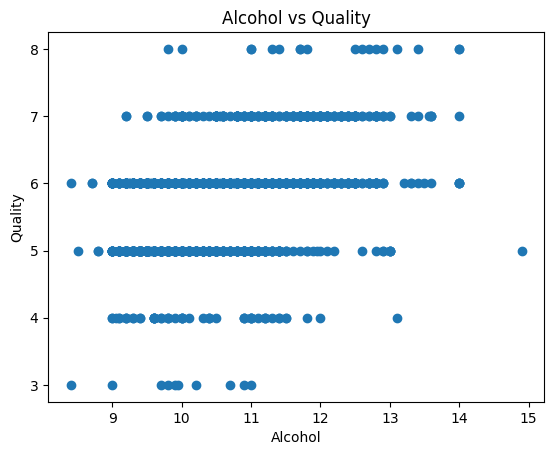

In [19]:
plt.scatter(wine['alcohol'],wine['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Alcohol vs Quality')

Text(0.5, 1.0, 'Volatile Acidity vs Quality')

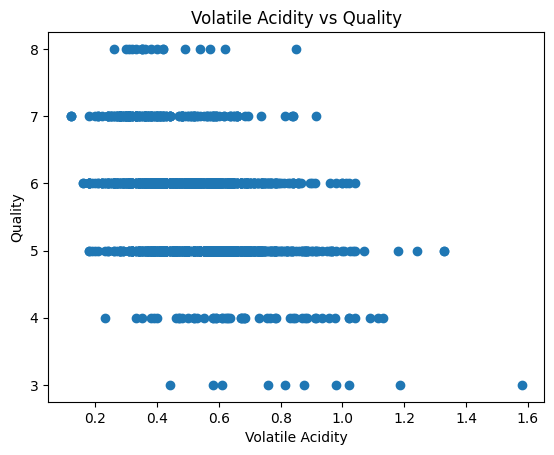

In [20]:
plt.scatter(wine['volatile acidity'],wine['quality'])
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.title('Volatile Acidity vs Quality')

In [21]:
# Let's check if we have missing values
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

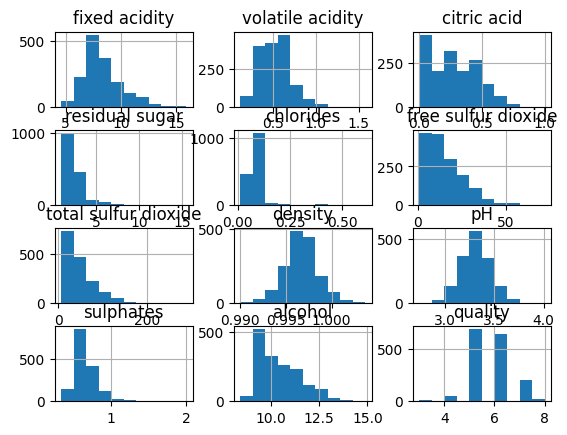

In [22]:
wine.hist()

In [23]:
#Min and Max values of wine quality
print(wine['quality'].max())
print(wine['quality'].min())


8
3


In [24]:
#Let's categorise the wine quality into bad or good wine from the the wine quality feature

In [25]:
cat = (3, 5.0, 8.0)
cat_name = ['bad','good']

In [26]:

wine['quality']= pd.cut(wine['quality'], bins= cat, labels= cat_name)

In [27]:
#Let's look at the first 10 values of the class
wine['quality'][:10]

0     bad
1     bad
2     bad
3    good
4     bad
5     bad
6     bad
7    good
8    good
9     bad
Name: quality, dtype: category
Categories (2, object): ['bad' < 'good']

In [28]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,bad


In [29]:
wine['quality'].unique()

['bad', 'good', NaN]
Categories (2, object): ['bad' < 'good']

In [30]:
#Using seaborn, let's look at the distribution of the values of the class.
#sns.countplot(wine['quality'])

NameError: name 'sns' is not defined

In [34]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [35]:
#Let's encode our wine quality class
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [50]:
#We need the LabelEncoder to encode our class values: bad = 0 and good = 1. 
wine_quality_class = LabelEncoder()

wine['quality']=wine_quality_class .fit_transform(wine['quality'])

In [51]:
wine['quality'][:10]

0    0
1    0
2    0
3    1
4    0
5    0
6    0
7    1
8    1
9    0
Name: quality, dtype: int64

In [38]:
wine.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [52]:
#How many wine is good or bad?

wine['quality'].value_counts()


1    855
0    734
2     10
Name: quality, dtype: int64

In [42]:
#sns.countplot(wine['quality'])

In [45]:
#let's extract the features and  the class, we store the features in X and the class in y.

X= wine.drop('quality', axis=1)
y = wine['quality']

In [46]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [47]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64

In [48]:
#Let's split our data for training
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

In [49]:
# We need to scale the features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train[:5]
       
       
       

# Building the Predictive Models








# Nearest Neighbor Model

In [53]:
from  sklearn.neighbors import KNeighborsClassifier 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_model = knn.fit(X_train, y_train)#trains the classification model

In [ ]:
predict_knn = knn_model.predict(X_test)#predicts the quality of wine using  classification model

In [ ]:
predict_knn[:10]#Let's see the first 10 predictions

# Model Evaluation
Using classification reports,
accuracy and confusion matrix.

In [ ]:
#Note:Evaluation Metrics...Layman definitions of basic metrics for classification
#Precision is the ability of the classifier not to label as positive a sample that is negative.
#Recall is the ability of the classifier to find all the positive samples.
#f-score is the weighted harmonic mean of precision and recall
#Accuracy: Informally, it's the fraction of predictions our model got right
#support is the number of occurrences of each class in y_test

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(classification_report(y_test,predict_knn))

In [ ]:
print(confusion_matrix(y_test,predict_knn))

# KNN Model Evaluation using Cross Validation

In [ ]:
from sklearn. model_selection import cross_val_score
scores = cross_val_score(knn_model, X_train, y_train, cv=10)
print("Accuracy:",round(scores.mean()*100,2),"%")

In [ ]:
#Using leave_one_out
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(knn_model, X_train, y_train, cv = LeaveOneOut())

print("Accuracy:",round(scores.mean()*100,2),"%")


# Random Forest Classification

In [ ]:
from  sklearn.ensemble import RandomForestClassifier

In [ ]:
rd =  RandomForestClassifier(n_estimators=150)
rd_model = rd.fit(X_train,y_train)

In [ ]:
predict_rd = rd_model.predict(X_test)#predicting the quality of wine using our random forest classification model

In [ ]:
predict_rd[:10]

In [ ]:
print(classification_report(y_test,predict_rd))

In [ ]:
#Using confusion matrix
#Every row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class.



In [ ]:
print(confusion_matrix(y_test,predict_rd))

# RF Model Evaluation using Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rd_model, X_train, y_train, cv=5)
print("Accuracy:",round(scores.mean()*100,2),"%")

In [ ]:
#Using leave_one_out CV
scores = cross_val_score(knn_model, X_train, y_train, cv = LeaveOneOut())

print("Accuracy:",round(scores.mean()*100,2),"%")

# Support Vector Machine(SVM)

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=1, gamma='auto')

In [ ]:
svc_model = svc.fit(X_train,y_train)

In [ ]:
predict_svc = svc_model.predict(X_test)

In [ ]:
predict_svc[:10]

In [ ]:
print(classification_report(y_test,predict_svc))

In [ ]:
#The confusion Matrix
print(confusion_matrix(y_test,predict_rd))

# SVM Model Evaluation using Cross Validation

In [ ]:
scores = cross_val_score(svc_model, X_train, y_train, cv=5)
print("Accuracy:",round(scores.mean()*100,2),"%")

# Persisting Predictive Models

In [ ]:
import pickle

In [ ]:
model = pickle.dumps(svc_model)# This persists the SVC model

In [ ]:
s_model = pickle.loads(model)#loads the model

In [ ]:
pred = s_model.predict(X_test)#predicts the class using the test data
pred[:10]